# Desafio da Envoltória Convexa em Python

Saving sample.jpg to sample.jpg


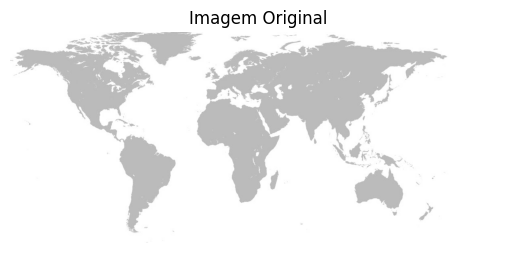

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Para abrir uma imagem do seu computador no Google Colab, você pode usar a biblioteca files que o Google Colab fornece
uploaded = files.upload()

# Depois de fazer o upload da imagem, você pode usar o nome do arquivo para acessá-la
# Leitura da imagem de entrada
src = cv2.imread("sample.jpg", 1)

# Exiba a imagem original
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')
plt.show()

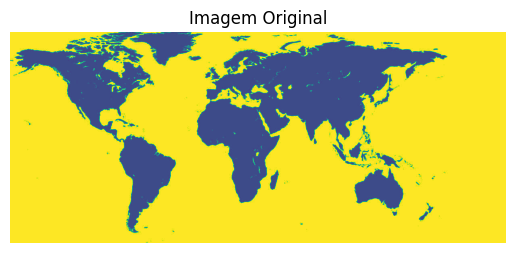

In [3]:
# Conversão da imagem para escala de cinza
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2GRAY))
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Exiba a imagem em escala de cinza
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

In [ ]:
# Aplicação de um desfoque (blur) na imagem para remover ruído
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Exiba a imagem após a aplicação do desfoque
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

In [ ]:
# Binarização da imagem para identificar os pontos de interesse
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Exiba a imagem binarizada
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

In [ ]:
# Encontre os contornos (bordas) na imagem
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Encontre a Envoltória Convexa para cada contorno
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Crie uma imagem em branco
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Desenhe os contornos em verde
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

# Desenhe a Envoltória Convexa em azul
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]

In [ ]:
# Exiba a imagem resultante com os contornos e a Envoltória Convexa
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]